In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

from mtb_data_set import MtbDataSet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
mtb_data_set = MtbDataSet()
mtb_data_set.create_data_set(['dandlberg_m_1'], 'delete_me_dataset.csv')

Creating dataset delete_me_dataset.csv
Converting Garmin .fit file ../data/dandlberg_m_1.fit
Converting gopro mp4 file ../data/dandlberg_m_1
Syncing data and gopro data...



Sync points are 6.545894247321494 meters apart ((47.765190275385976, 12.166631268337369), (47.7651434, 12.1666841), 5375, 1658)


/usr/local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1092: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


NameError: name 'web_apis_data' is not defined

Index(['Milliseconds', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'Speed3D',
       'TS', 'GpsAccuracy', 'GpsFix'],
      dtype='object')
964206900000.0
(47.764671299999996, 12.167012099999999)
(47.76504129999999, 12.1669148)


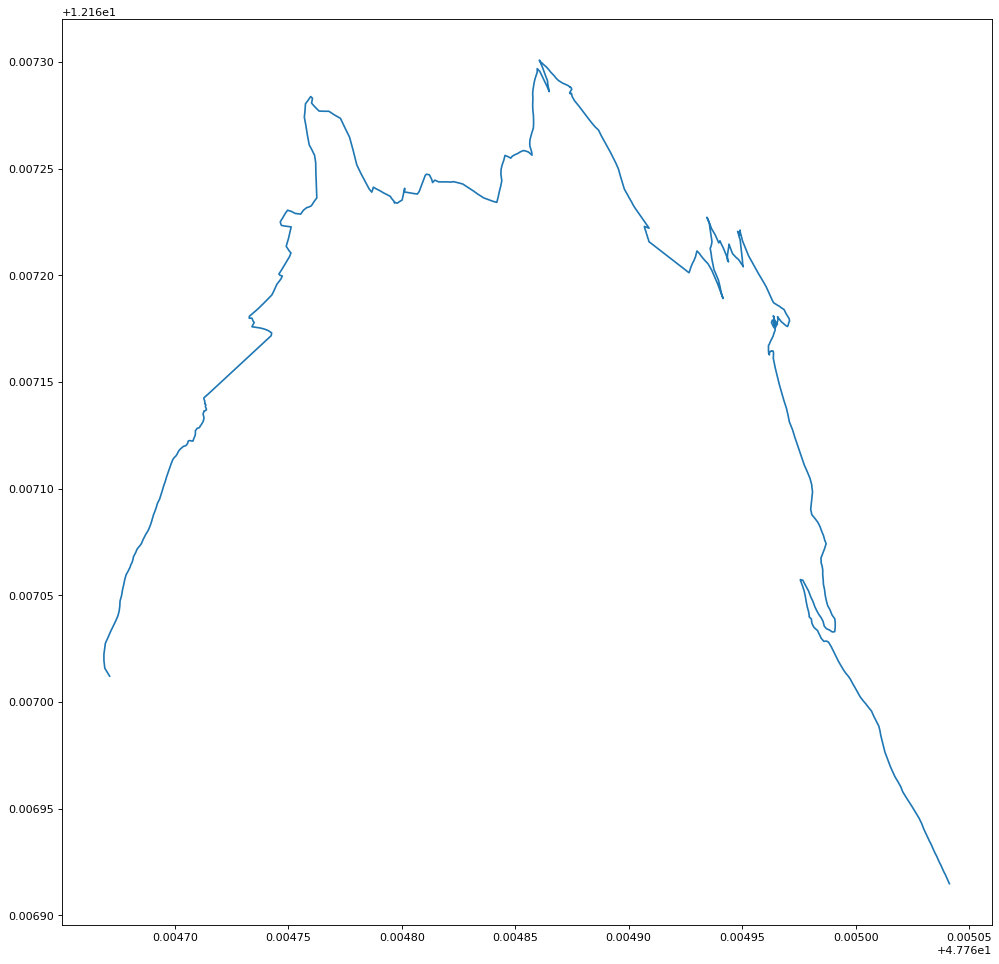

In [109]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

garmin = pd.read_csv('../data/dandlberg_m_1-tmp.csv', low_memory=False)
gopro = pd.read_csv('../data/dandlberg_m_1_gopro-gps.csv', low_memory=False)

gopro = gopro.query("GpsAccuracy < 300")
print(pd.read_csv('../data/dandlberg_m_1_gopro-gps.csv', low_memory=False).columns)

print(garmin.values[0][0])

#geometry = gpd.points_from_xy(garmin[:, -2], garmin[:, -1])
#geometry2 = gpd.points_from_xy(gopro['Latitude'].values, gopro['Longitude'].values)
#gdf = GeoDataFrame(geometry=geometry)
#gdf2 = GeoDataFrame(geometry=geometry2)
#gdf.plot(figsize=(20, 30))
#gdf2.plot(figsize=(20, 30))

print((gopro['Latitude'].values[0], gopro['Longitude'].values[0]))
print((gopro['Latitude'].values[-1], gopro['Longitude'].values[-1]))

figure(1, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(garmin.values[:, -2], garmin.values[:, -1])
plt.plot(gopro['Latitude'].values, gopro['Longitude'].values)
#plt.plot(gopro['Altitude'].values)
plt.show()